# Making Informed Investment Decisions in California Housing Market using Machine Learning

Student Name : Bhavya Hegde <br>
Team Name : Code Wizards  <br>
SJSU ID : 016656029 <br>

The following cells consists of:

Amlgamation

Data narrative

Data visualization

Data cleaning and preprocession

Logistic regression for both main dataset and enriched dataset

Muller loop for both main dataset and enriched dataset

Decission tree for both main dataset and enriched dataset

Business Narrative :
Our mission is to provide valuable insights and guidance to prospective investors and homebuyers, empowering them to make informed decisions about investing in real estate. We understand that real estate is a significant financial commitment, and it’s crucial to assess its viability thoroughly. Through our platform, we offer a comprehensive suite of tools, data, and expertise to help individuals navigate the complex world of real estate investments.

In [49]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [50]:
# Authenticate and PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [51]:
id="1k9gWDcWR7ISxComXK1ZGLQYCQ6LygNyV"

In [52]:
from pandas.core.indexes.interval import InvalidIndexError
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
%matplotlib inline
%load_ext google.colab.data_table

import seaborn as seabornInstance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.calibration import calibration_curve
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", message="Variables are collinear")

warnings.filterwarnings("ignore", category=ConvergenceWarning)


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [53]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('RF_Housingdata_final_new.csv')
data=pd.read_csv("RF_Housingdata_final_new.csv")


## **Data Narrative**

Main dataset is downloaded from redfin and uploaded here  : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq- <br>

Scrapped data for <br>
walk score is from :  https://www.walkscore.com/ <br>
crime rate , property crime: https://247wallst.com/state/crime-in-california/ <br>
School rating : https://www.niche.com/places-to-live/z/95134/ <br>

all the data mentioned here is uploaded in the data folder under(https://drive.google.com/drive/u/2/folders/1VmtLYCkWVi06I0fiD4URPcnLRHanyO-B) <br>

Final dataset : https://drive.google.com/drive/u/2/folders/1loMBo5UB_9acDQlJCkSyP4pFmRagVwq- <br>

In this dataset, we are exploring various attributes related to property sales in a specific region. The dataset contains the following columns:

**SALE TYPE**: This column indicates the type of sale transaction that took place. It could include categories such as new listings, resale, foreclosure, etc.

**SOLD DATE**: The date on which the property was sold. This would help in analyzing the time trends in property sales.

**PROPERTY TYPE**: This column categorizes the properties into various types such as single-family homes, apartments, condos, etc.

**ADDRESS**: The specific address of the property, providing detailed location information.

**CITY**: The city where the property is located.

STATE OR PROVINCE: The state or province where the property is situated.

**ZIP_CODE**: The postal code of the property's location, which can be used for regional analysis.

**PRICE**: The selling price of the property. This is a critical column for analyzing the real estate market trends.

**BEDS**: The number of bedrooms in the property, which is a vital attribute affecting the property's price.

**BATHS**: The number of bathrooms in the property, another significant factor influencing the property's value.

**SOURCE**: The source from where the data was collected, which could help in verifying the authenticity of the data.

**MLS#**: The Multiple Listing Service number, a unique identifier for the property listing.

**FAVORITE**: A column indicating whether the property was marked as a favorite, possibly by potential buyers or real estate agents.

**INTERESTED**: This column might indicate the level of interest or the number of interested parties for a particular property.

**LATITUDE & LONGITUDE**: These columns provide the geographical coordinates of the property, which can be used for geographical analyses and visualizations.

**WALK_SCORE**: A score indicating the walkability of the neighborhood where the property is located. It can be a significant factor for buyers.

**PROPERTY_CRIME**: This column indicates the rate of property crimes in the area where the property is located, which can influence the property's desirability.

**TOTAL_CRIME**: A column indicating the total crime rate in the area, encompassing various types of crimes.

**SCHOOL_RANKING**: This column provides information on the ranking of schools in the vicinity of the property, a significant factor for families with children

In [54]:
data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP_CODE,PRICE,BEDS,BATHS,...,LATITUDE,LONGITUDE,WALK_SCORE,PROPERTY_CRIME,TOTAL_CRIME,SCHOOL_RANKING,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR
0,MLS Listing,NaN,Condo/Co-op,407 Orange St #301,Oakland,CA,94610,535000,1.0,1.0,...,37.817373,-122.254688,84,6421,7692,712.0,5350,64200,3203,38436
1,MLS Listing,NaN,Single Family Residential,5450 Proctor Ave,Oakland,CA,94618,1075000,1.0,1.0,...,37.835305,-122.221226,30,6421,7692,582.0,10750,129000,6437,77244
2,MLS Listing,NaN,Condo/Co-op,1001 46Th St #212,Emeryville,CA,94608,589000,1.0,1.0,...,37.835468,-122.276067,90,21187,22528,NaN,5890,70680,3527,42324
3,MLS Listing,NaN,Condo/Co-op,245 Perkins St #104,Oakland,CA,94610,439000,1.0,1.0,...,37.814753,-122.255872,84,6421,7692,712.0,4390,52680,2629,31548
4,MLS Listing,NaN,Condo/Co-op,666 Oakland Ave #105,Oakland,CA,94611,419000,1.0,1.0,...,37.820653,-122.249832,86,6421,7692,564.0,4190,50280,2509,30108


In [55]:
data.shape

(4042, 35)

In [56]:
data = data.drop(columns=['SOLD DATE','SALE TYPE','DAYS ON MARKET','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME', 'STATUS','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE','FAVORITE', 'INTERESTED', 'MLS#'])

In [57]:
data['PRICE'] = data['PRICE'].astype(float)
data['BEDS'] = data['BEDS'].astype(float)
data['BATHS'] = data['BATHS'].astype(float)
data['SQUARE FEET'] = data['SQUARE FEET'].astype(float)
data['LOT SIZE'] = data['LOT SIZE'].astype(float)
data['YEAR BUILT'] = data['YEAR BUILT'].astype(float)
data['$/SQUARE FEET'] = data['$/SQUARE FEET'].astype(float)
data['HOA/MONTH'] = data['HOA/MONTH'].astype(float)
data['WALK_SCORE'] = data['WALK_SCORE'].astype(float)
data['PROPERTY_CRIME'] = data['PROPERTY_CRIME'].astype(float)
data['TOTAL_CRIME'] = data['TOTAL_CRIME'].astype(float)
data['SCHOOL_RANKING'] = data['SCHOOL_RANKING'].astype(float)
data['MONTHLY_RENT_ESTIMATE'] = data['MONTHLY_RENT_ESTIMATE'].astype(float)
data['ANNUAL_RENT_ESTIMATE'] = data['ANNUAL_RENT_ESTIMATE'].astype(float)
data['MORTGAGE_FEES_PER_MONTH'] = data['MORTGAGE_FEES_PER_MONTH'].astype(float)
data['MORTGAGE_FEES_PER_YEAR'] = data['MORTGAGE_FEES_PER_YEAR'].astype(float)


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PROPERTY TYPE            4042 non-null   object 
 1   ADDRESS                  4031 non-null   object 
 2   CITY                     4042 non-null   object 
 3   STATE OR PROVINCE        4042 non-null   object 
 4   ZIP_CODE                 4042 non-null   int64  
 5   PRICE                    4042 non-null   float64
 6   BEDS                     3901 non-null   float64
 7   BATHS                    3807 non-null   float64
 8   LOCATION                 4039 non-null   object 
 9   SQUARE FEET              3854 non-null   float64
 10  LOT SIZE                 3173 non-null   float64
 11  YEAR BUILT               3672 non-null   float64
 12  $/SQUARE FEET            3854 non-null   float64
 13  HOA/MONTH                1563 non-null   float64
 14  LATITUDE                

#Amalgamation

As part of the data amalgamation we have combined the dataset from different sources below are the sources for the data
walk score is from : https://www.walkscore.com/ <br>
crime rate , property crime: https://247wallst.com/state/crime-in-california <br>
School rating : https://www.niche.com/places-to-live/z/95134/ <br>

by using these we have  created a richer dataset that can be used to train a machine learning model. in addition to these we are adding fwe more columns such as  MONTHLY_RENT_ESTIMATE, ANNUAL_RENT_ESTIMATE, MORTGAGE_FEES_PER_MONTH, MORTGAGE_FEES_PER_YEAR and adding as the additional columns for the enriched dataset

#Data Visualization

array([[<Axes: title={'center': 'ZIP_CODE'}>,
        <Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'BEDS'}>,
        <Axes: title={'center': 'BATHS'}>],
       [<Axes: title={'center': 'SQUARE FEET'}>,
        <Axes: title={'center': 'LOT SIZE'}>,
        <Axes: title={'center': 'YEAR BUILT'}>,
        <Axes: title={'center': '$/SQUARE FEET'}>],
       [<Axes: title={'center': 'HOA/MONTH'}>,
        <Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'WALK_SCORE'}>],
       [<Axes: title={'center': 'PROPERTY_CRIME'}>,
        <Axes: title={'center': 'TOTAL_CRIME'}>,
        <Axes: title={'center': 'SCHOOL_RANKING'}>,
        <Axes: title={'center': 'MONTHLY_RENT_ESTIMATE'}>],
       [<Axes: title={'center': 'ANNUAL_RENT_ESTIMATE'}>,
        <Axes: title={'center': 'MORTGAGE_FEES_PER_MONTH'}>,
        <Axes: title={'center': 'MORTGAGE_FEES_PER_YEAR'}>, <Axes: >]],
      dtype=object)

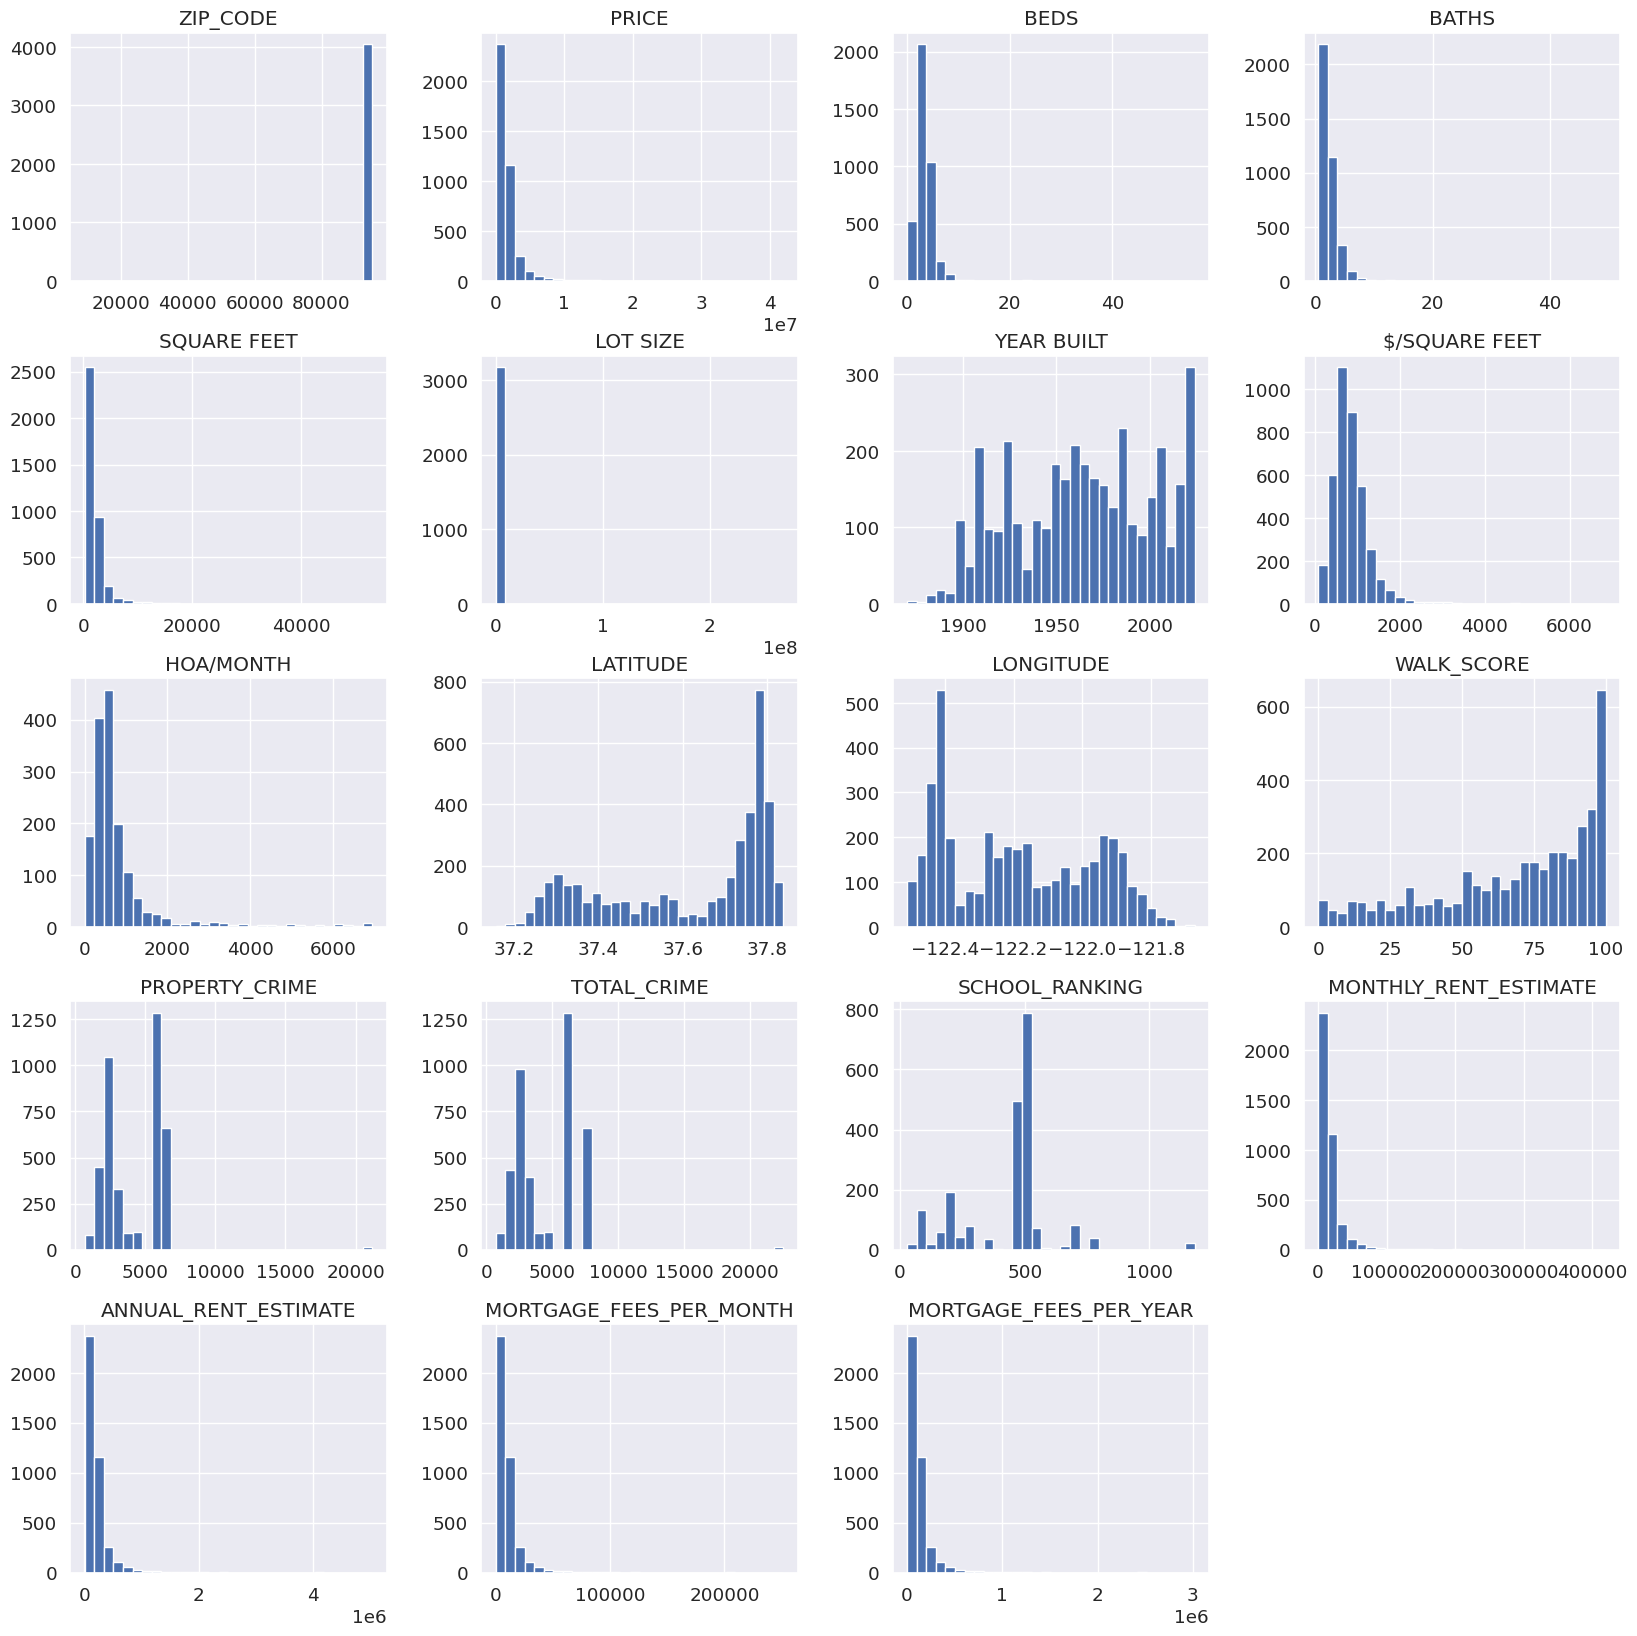

In [59]:
data.hist(bins=30,figsize=[20,20])

#Data Cleaning and preprocessing

 Display NULL data value using heatmap


<Axes: title={'center': 'Missing data'}, ylabel='Count'>

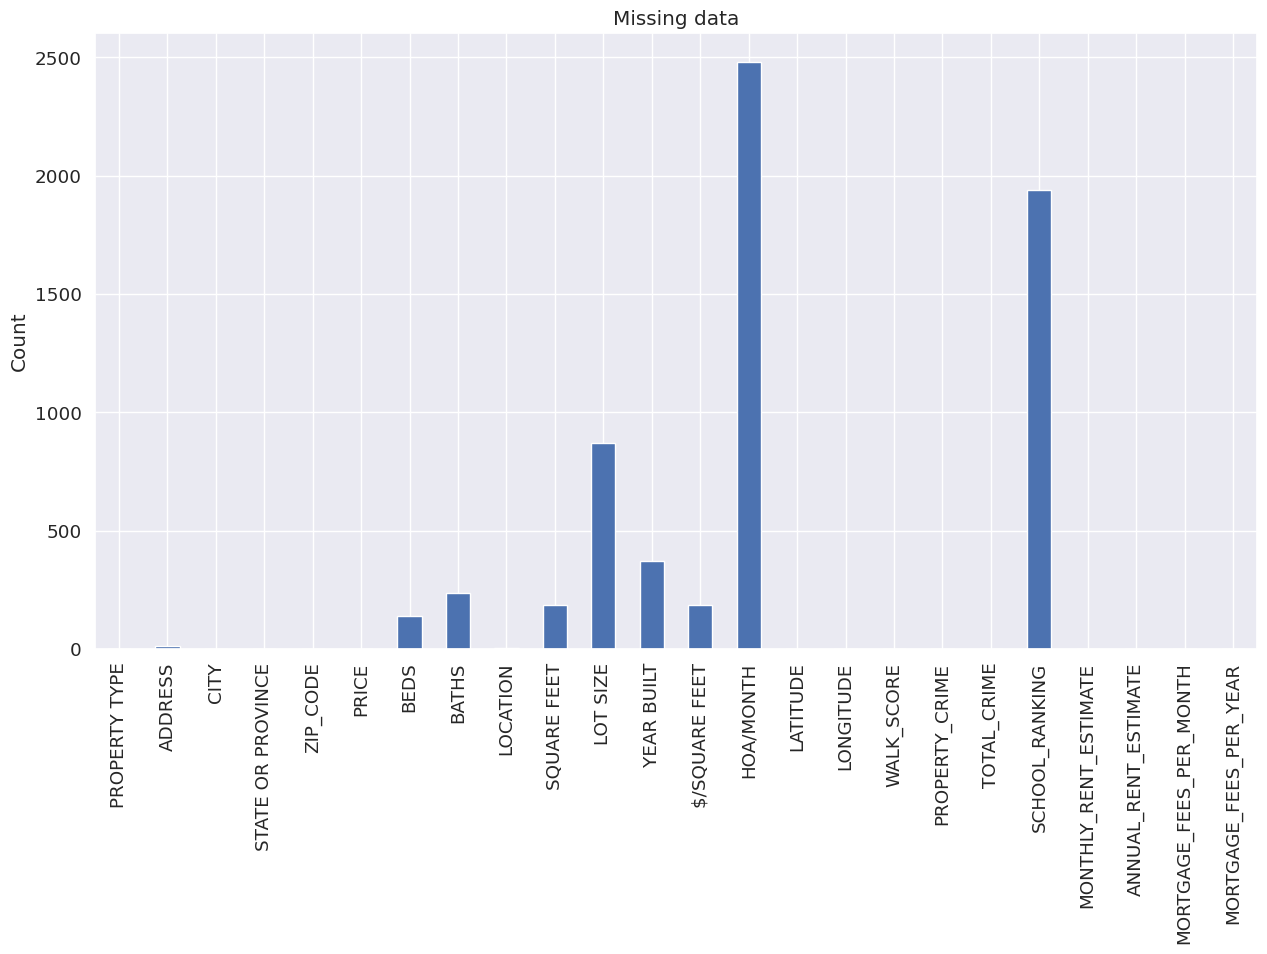

In [60]:
plt.figure(figsize=(15,8))
plt.title('Missing data')
plt.ylabel("Count")
data.isnull().sum().plot(kind= 'bar' )

In [61]:
data.duplicated().any()

True

In [62]:
data = data.drop_duplicates()

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3884 entries, 0 to 4041
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PROPERTY TYPE            3884 non-null   object 
 1   ADDRESS                  3873 non-null   object 
 2   CITY                     3884 non-null   object 
 3   STATE OR PROVINCE        3884 non-null   object 
 4   ZIP_CODE                 3884 non-null   int64  
 5   PRICE                    3884 non-null   float64
 6   BEDS                     3754 non-null   float64
 7   BATHS                    3660 non-null   float64
 8   LOCATION                 3881 non-null   object 
 9   SQUARE FEET              3707 non-null   float64
 10  LOT SIZE                 3037 non-null   float64
 11  YEAR BUILT               3525 non-null   float64
 12  $/SQUARE FEET            3707 non-null   float64
 13  HOA/MONTH                1513 non-null   float64
 14  LATITUDE                

In [64]:
data.isnull().sum()

PROPERTY TYPE                 0
ADDRESS                      11
CITY                          0
STATE OR PROVINCE             0
ZIP_CODE                      0
PRICE                         0
BEDS                        130
BATHS                       224
LOCATION                      3
SQUARE FEET                 177
LOT SIZE                    847
YEAR BUILT                  359
$/SQUARE FEET               177
HOA/MONTH                  2371
LATITUDE                      0
LONGITUDE                     0
WALK_SCORE                    0
PROPERTY_CRIME                0
TOTAL_CRIME                   0
SCHOOL_RANKING             1798
MONTHLY_RENT_ESTIMATE         0
ANNUAL_RENT_ESTIMATE          0
MORTGAGE_FEES_PER_MONTH       0
MORTGAGE_FEES_PER_YEAR        0
dtype: int64

In [65]:
data = data.copy()
data.fillna({
    'ADDRESS': 'Unknown',
    'BEDS': 0,
    'BATHS': 0,
    'LOCATION': 'Unknown',
    'SQUARE FEET': 0,
    'LOT SIZE': 0,
    'YEAR BUILT': data['YEAR BUILT'].median(),
    '$/SQUARE FEET': data['$/SQUARE FEET'].mean(),
    'HOA/MONTH': 0,
    'SCHOOL_RANKING': data['SCHOOL_RANKING'].mean()
}, inplace=True)

In [66]:
data.isnull().sum()

PROPERTY TYPE              0
ADDRESS                    0
CITY                       0
STATE OR PROVINCE          0
ZIP_CODE                   0
PRICE                      0
BEDS                       0
BATHS                      0
LOCATION                   0
SQUARE FEET                0
LOT SIZE                   0
YEAR BUILT                 0
$/SQUARE FEET              0
HOA/MONTH                  0
LATITUDE                   0
LONGITUDE                  0
WALK_SCORE                 0
PROPERTY_CRIME             0
TOTAL_CRIME                0
SCHOOL_RANKING             0
MONTHLY_RENT_ESTIMATE      0
ANNUAL_RENT_ESTIMATE       0
MORTGAGE_FEES_PER_MONTH    0
MORTGAGE_FEES_PER_YEAR     0
dtype: int64

#Logistic Regression on the main dataset

To classify expensive houses in the bay area <br>



The median price is: 1270000.0


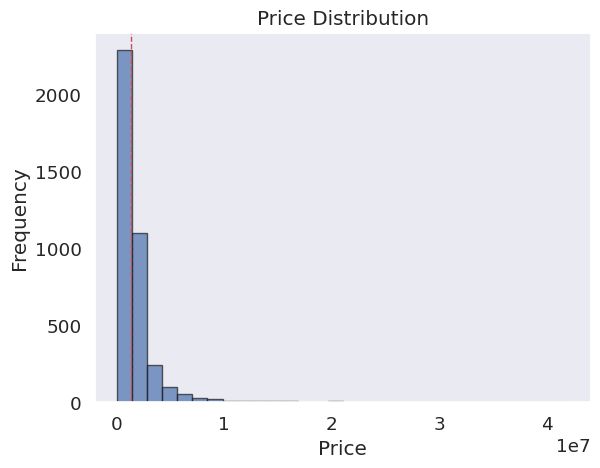

In [67]:
import matplotlib.pyplot as plt

# Calculate the median
price_median = data['PRICE'].median()
print(f"The median price is: {price_median}")

# Plot the distribution of the "PRICE" column with a vertical line indicating the median
plt.figure()
data['PRICE'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.axvline(price_median, color='r', linestyle='dashed', linewidth=1)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


creating a binary outcome variable:
from the above graph we are assuming if the house sell price is more than 1.27m, then it is expensive, otherwise, not expensive and we are training the model on basis of this using both main dataset and enriched dataset

In [68]:
df = data.copy()

Selecting the data which was present in the main dataset

In [69]:
features_to_use = [
    'BEDS', 'BATHS', 'SQUARE FEET','PRICE' , 'LOT SIZE', 'YEAR BUILT',
    '$/SQUARE FEET', 'WALK_SCORE', 'SCHOOL_RANKING',
    'PROPERTY_CRIME', 'TOTAL_CRIME'
]


df = df[features_to_use]

In [70]:
df['Expensive?'] = np.where(df['PRICE']>1270000,1,0)
df.head()

,BEDS,BATHS,SQUARE FEET,PRICE,LOT SIZE,YEAR BUILT,$/SQUARE FEET,WALK_SCORE,SCHOOL_RANKING,PROPERTY_CRIME,TOTAL_CRIME,Expensive?
0,1.0,1.0,971.0,535000.0,19457.0,1970.0,551.0,84.0,712.000000,6421.0,7692.0,0
1,1.0,1.0,1265.0,1075000.0,9000.0,1931.0,850.0,30.0,582.000000,6421.0,7692.0,0
2,1.0,1.0,1051.0,589000.0,30135.0,2008.0,560.0,90.0,432.224832,21187.0,22528.0,0
3,1.0,1.0,715.0,439000.0,17016.0,1985.0,614.0,84.0,712.000000,6421.0,7692.0,0
4,1.0,1.0,757.0,419000.0,8303.0,1965.0,554.0,86.0,564.000000,6421.0,7692.0,0


In [71]:
#creating the features and labels dataset for logistic regression
X2=df.drop(columns=['PRICE','Expensive?'])
y2=df['Expensive?']
y2.head()

0    0
1    0
2    0
3    0
4    0
Name: Expensive?, dtype: int64

In [72]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=0)

In [73]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [74]:
logistic.fit(X2_train,y2_train)

LogisticRegression()

In [75]:
accuracy=logistic.score(X2_test, y2_test)
accuracy = "{:.0%}".format(accuracy)

In [76]:
print(accuracy)

92%


# Logistic Regression on the Enriched dataset

In [77]:
df2 = data.copy()

In [78]:
features_to_use2 = [
    'BEDS', 'BATHS', 'SQUARE FEET','PRICE' , 'LOT SIZE', 'YEAR BUILT',
    '$/SQUARE FEET', 'WALK_SCORE', 'SCHOOL_RANKING',
    'PROPERTY_CRIME', 'TOTAL_CRIME','MONTHLY_RENT_ESTIMATE','ANNUAL_RENT_ESTIMATE','MORTGAGE_FEES_PER_MONTH','MORTGAGE_FEES_PER_YEAR'
]

# Create a new DataFrame with only the selected columns
df2 = df2[features_to_use2]

In [79]:
df2.loc[:, 'Expensive?'] = np.where(df2['PRICE']>1270000, 1, 0)
df2.head()

,BEDS,BATHS,SQUARE FEET,PRICE,LOT SIZE,YEAR BUILT,$/SQUARE FEET,WALK_SCORE,SCHOOL_RANKING,PROPERTY_CRIME,TOTAL_CRIME,MONTHLY_RENT_ESTIMATE,ANNUAL_RENT_ESTIMATE,MORTGAGE_FEES_PER_MONTH,MORTGAGE_FEES_PER_YEAR,Expensive?
0,1.0,1.0,971.0,535000.0,19457.0,1970.0,551.0,84.0,712.000000,6421.0,7692.0,5350.0,64200.0,3203.0,38436.0,0
1,1.0,1.0,1265.0,1075000.0,9000.0,1931.0,850.0,30.0,582.000000,6421.0,7692.0,10750.0,129000.0,6437.0,77244.0,0
2,1.0,1.0,1051.0,589000.0,30135.0,2008.0,560.0,90.0,432.224832,21187.0,22528.0,5890.0,70680.0,3527.0,42324.0,0
3,1.0,1.0,715.0,439000.0,17016.0,1985.0,614.0,84.0,712.000000,6421.0,7692.0,4390.0,52680.0,2629.0,31548.0,0
4,1.0,1.0,757.0,419000.0,8303.0,1965.0,554.0,86.0,564.000000,6421.0,7692.0,4190.0,50280.0,2509.0,30108.0,0


In [80]:
X3=df2.drop(columns=['PRICE','Expensive?'])
y3=df2['Expensive?']
y3.head()

0    0
1    0
2    0
3    0
4    0
Name: Expensive?, dtype: int64

In [81]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size=0.2, random_state=0)

In [82]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [83]:
logistic.fit(X3_train,y3_train)

LogisticRegression()

In [84]:
accuracy=logistic.score(X3_test, y3_test)
accuracy = "{:.0%}".format(accuracy)

In [85]:
print(accuracy)

99%


#Muller Loop on the main dataset

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = df[features_to_use], df['Expensive?']

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)

# TODO (Apply): All cross-validation

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 89.70, Training time = 0.17 seconds
Classifier = Linear SVM, Score (test, accuracy) = 92.66, Training time = 0.50 seconds
Classifier = RBF SVM, Score (test, accuracy) = 91.76, Training time = 1.09 seconds
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.02 seconds
Classifier = Random Forest, Score (test, accuracy) = 99.49, Training time = 0.06 seconds
Classifier = Neural Net, Score (test, accuracy) = 97.04, Training time = 8.74 seconds
Classifier = AdaBoost, Score (test, accuracy) = 100.00, Training time = 0.01 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 91.25, Training time = 0.01 seconds
Classifier = QDA, Score (test, accuracy) = 88.03, Training time = 0.02 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Decision Tree, Score (test, accuracy) = 100.00


# Muller Loop on the Enriched dataset

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from time import time

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = df2[features_to_use2], df2['Expensive?']

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)

# TODO (Apply): All cross-validation

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 89.70, Training time = 0.20 seconds
Classifier = Linear SVM, Score (test, accuracy) = 97.43, Training time = 0.28 seconds
Classifier = RBF SVM, Score (test, accuracy) = 92.54, Training time = 0.94 seconds
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.01 seconds
Classifier = Random Forest, Score (test, accuracy) = 100.00, Training time = 0.04 seconds
Classifier = Neural Net, Score (test, accuracy) = 99.10, Training time = 2.26 seconds
Classifier = AdaBoost, Score (test, accuracy) = 100.00, Training time = 0.01 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 91.38, Training time = 0.00 seconds
Classifier = QDA, Score (test, accuracy) = 88.42, Training time = 0.01 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Decision Tree, Score (test, accuracy) = 100.00


#Decission Tree for the main dataset

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
clf.fit(X2_train, y2_train)

# Predict the labels on the test data
y2_pred = clf.predict(X2_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y2_test, y2_pred)

print(f"Decision Tree Classifier Accuracy: {accuracy * 100:.2f}%")



Decision Tree Classifier Accuracy: 96.40%


## Decission tree

Decision Tree Classifier Accuracy: 90.22%


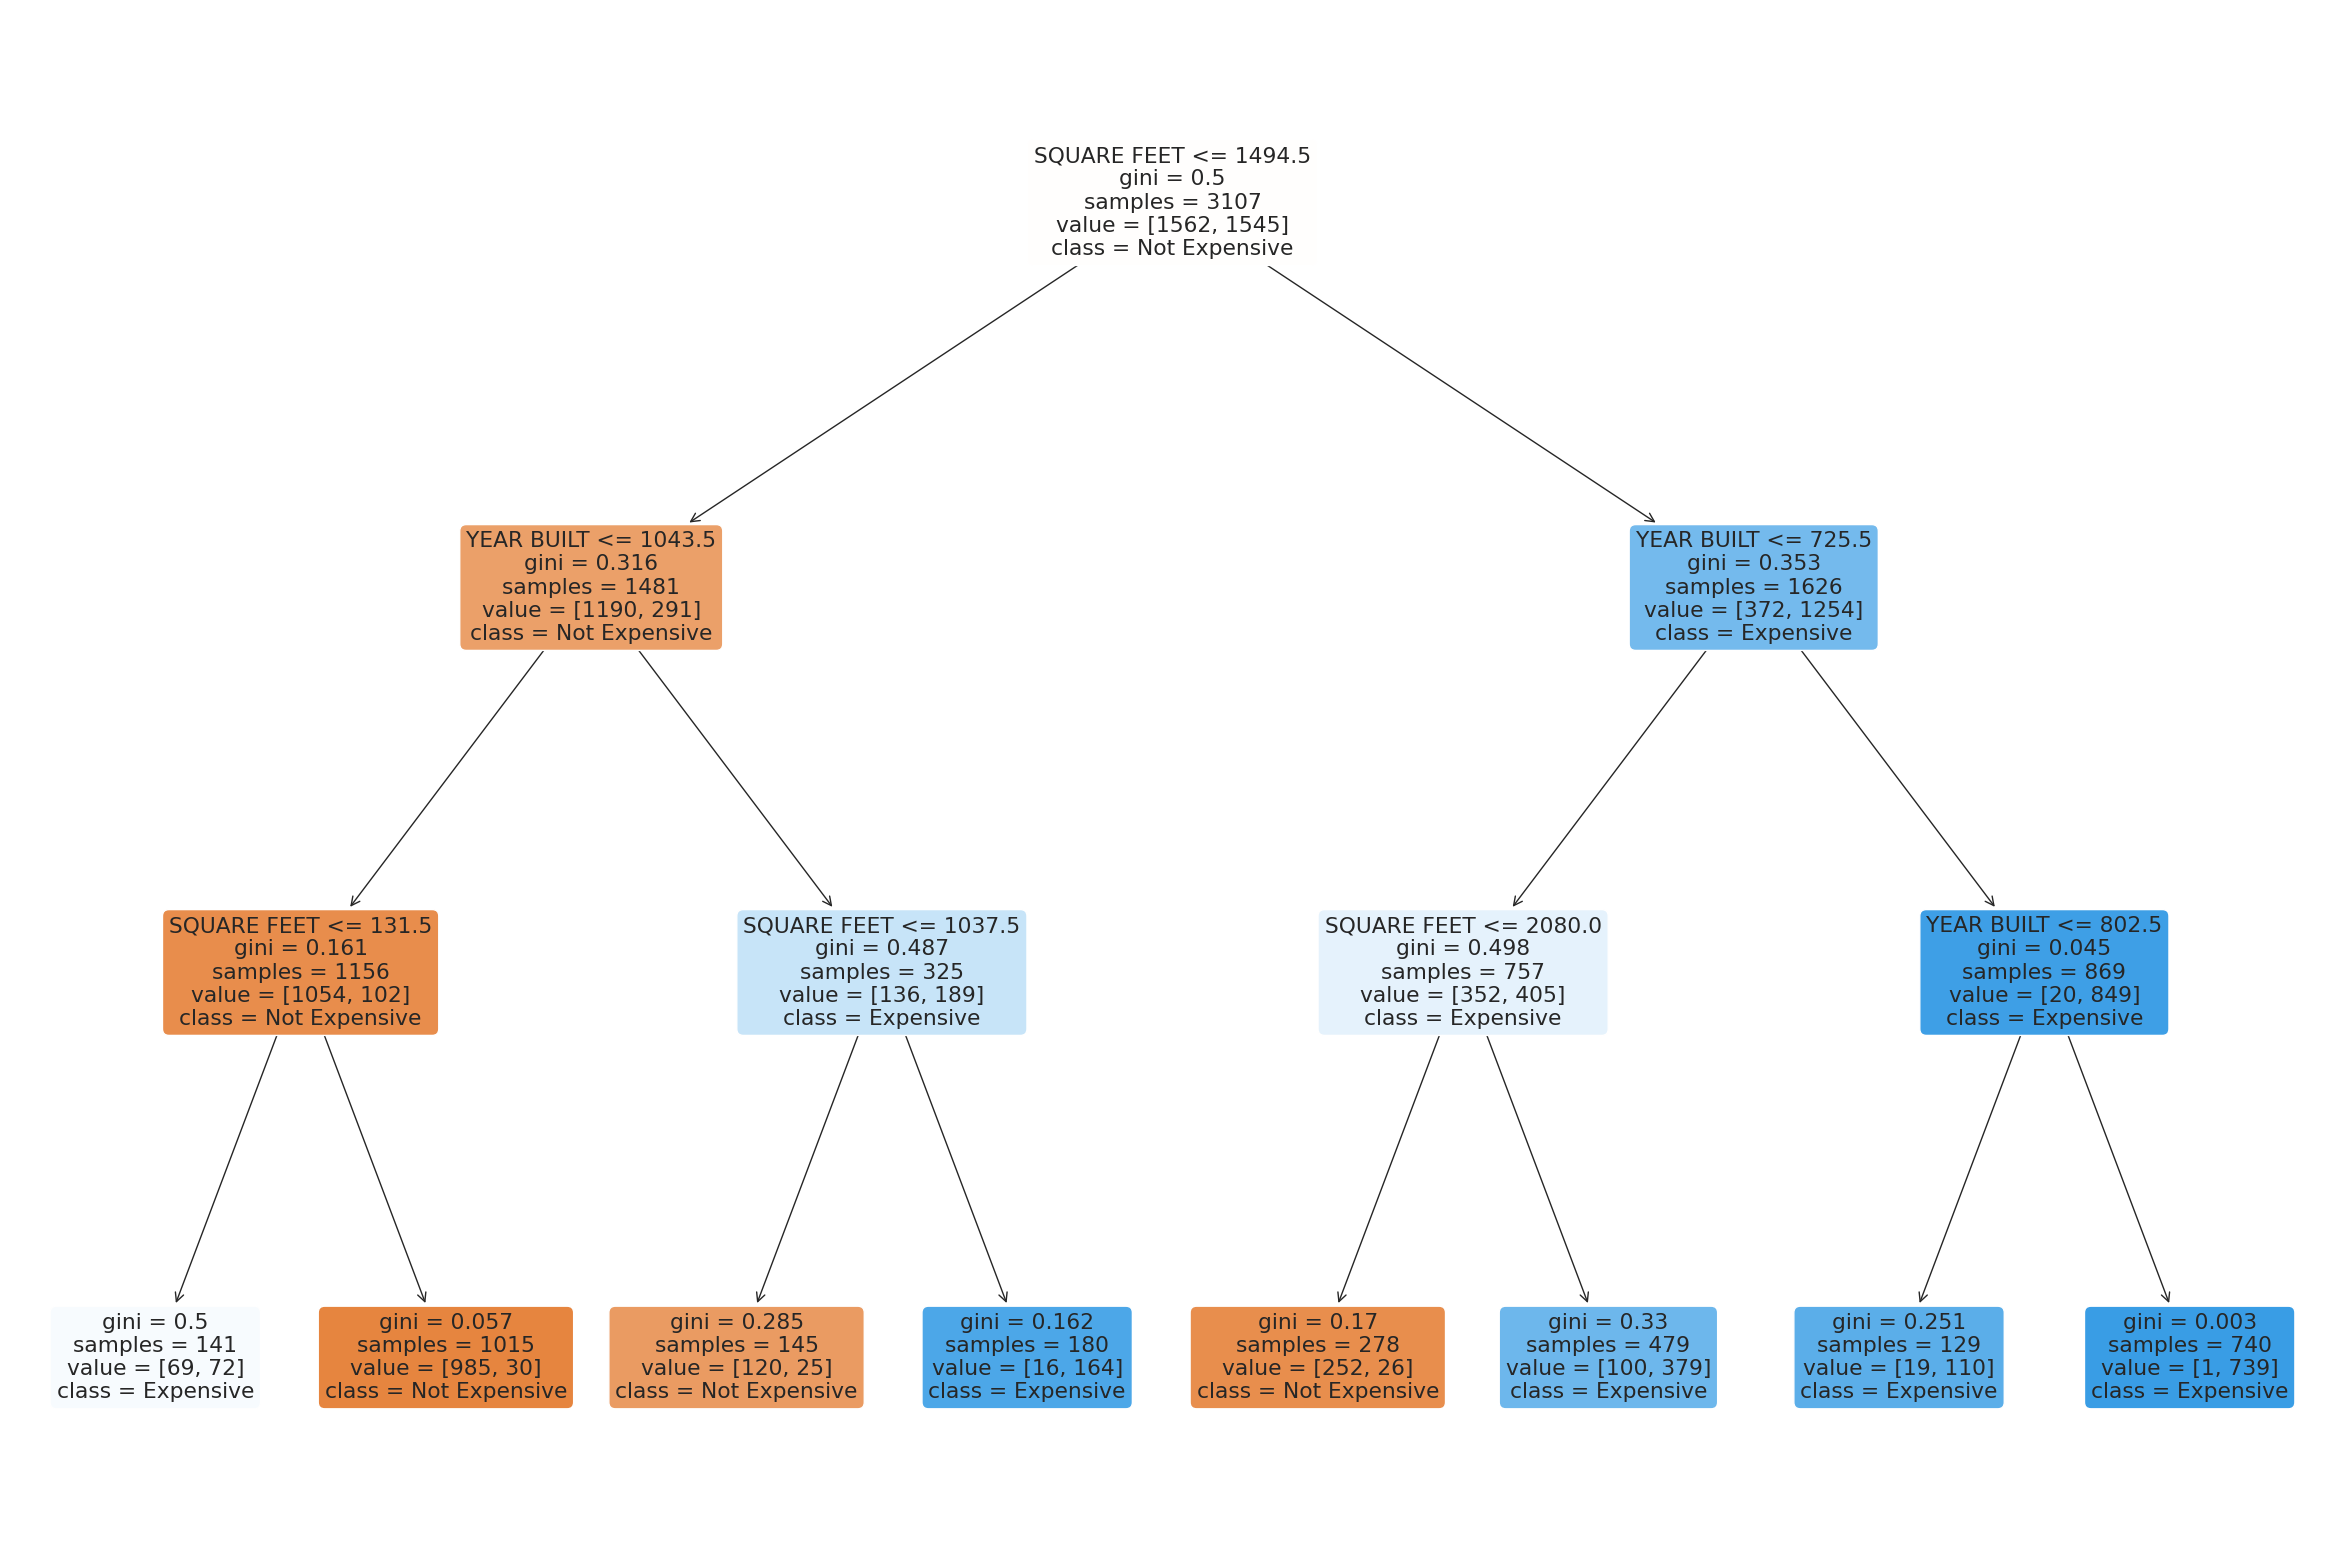

In [89]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=0, max_depth=3)

# Fit the model on the training data
clf.fit(X2_train, y2_train)

# Predict the labels on the test data
y2_pred = clf.predict(X2_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y2_test, y2_pred)

print(f"Decision Tree Classifier Accuracy: {accuracy * 100:.2f}%")


plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names=features_to_use, class_names=['Not Expensive', 'Expensive'], filled=True, rounded=True)
plt.savefig('decision_tree.png', dpi=300) # Saves the plot as a file
plt.show()


In [90]:
print(len(clf.feature_importances_))

10


## Feature Importance

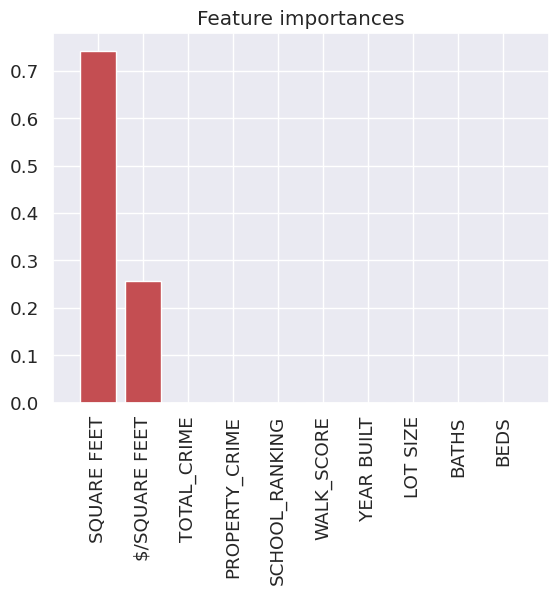

In [91]:
import matplotlib.pyplot as plt



# Get feature importances
importances = clf.feature_importances_

# Get the indices of the most important features, sorted by importance
indices = importances.argsort()[::-1]

# List of features used in training the model
features_to_use = [
    'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
    '$/SQUARE FEET', 'WALK_SCORE', 'SCHOOL_RANKING',
    'PROPERTY_CRIME', 'TOTAL_CRIME'
]

# Get the number of features
num_features = len(features_to_use)

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="r", align="center")
plt.xticks(range(num_features), [features_to_use[i] for i in indices], rotation='vertical')
plt.xlim([-1, num_features])
plt.show()




##  Confusion Matrix

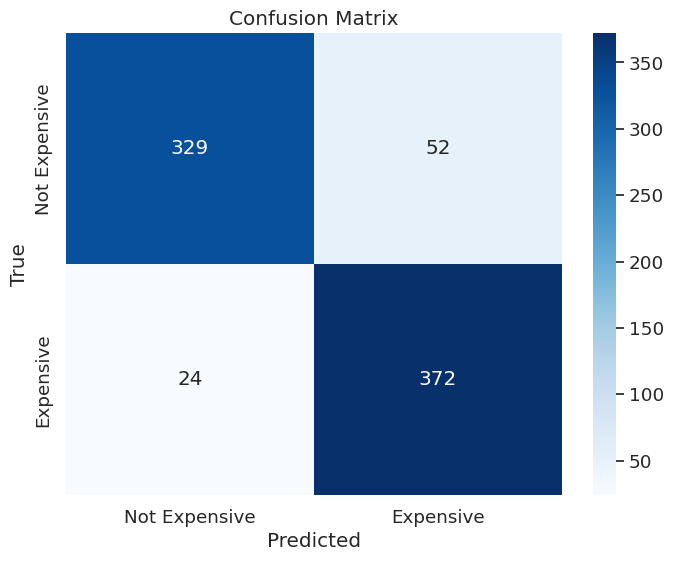

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y2_test, y2_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Expensive', 'Expensive'], yticklabels=['Not Expensive', 'Expensive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Decission Tree for the enriched dataset

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
clf2 = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
clf2.fit(X3_train, y3_train)

# Predict the labels on the test data
y3_pred = clf2.predict(X3_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y3_test, y3_pred)

print(f"Decision Tree Classifier Accuracy: {accuracy * 100:.2f}%")

Decision Tree Classifier Accuracy: 100.00%


## Decission Tree

Decision Tree Classifier Accuracy: 100.00%


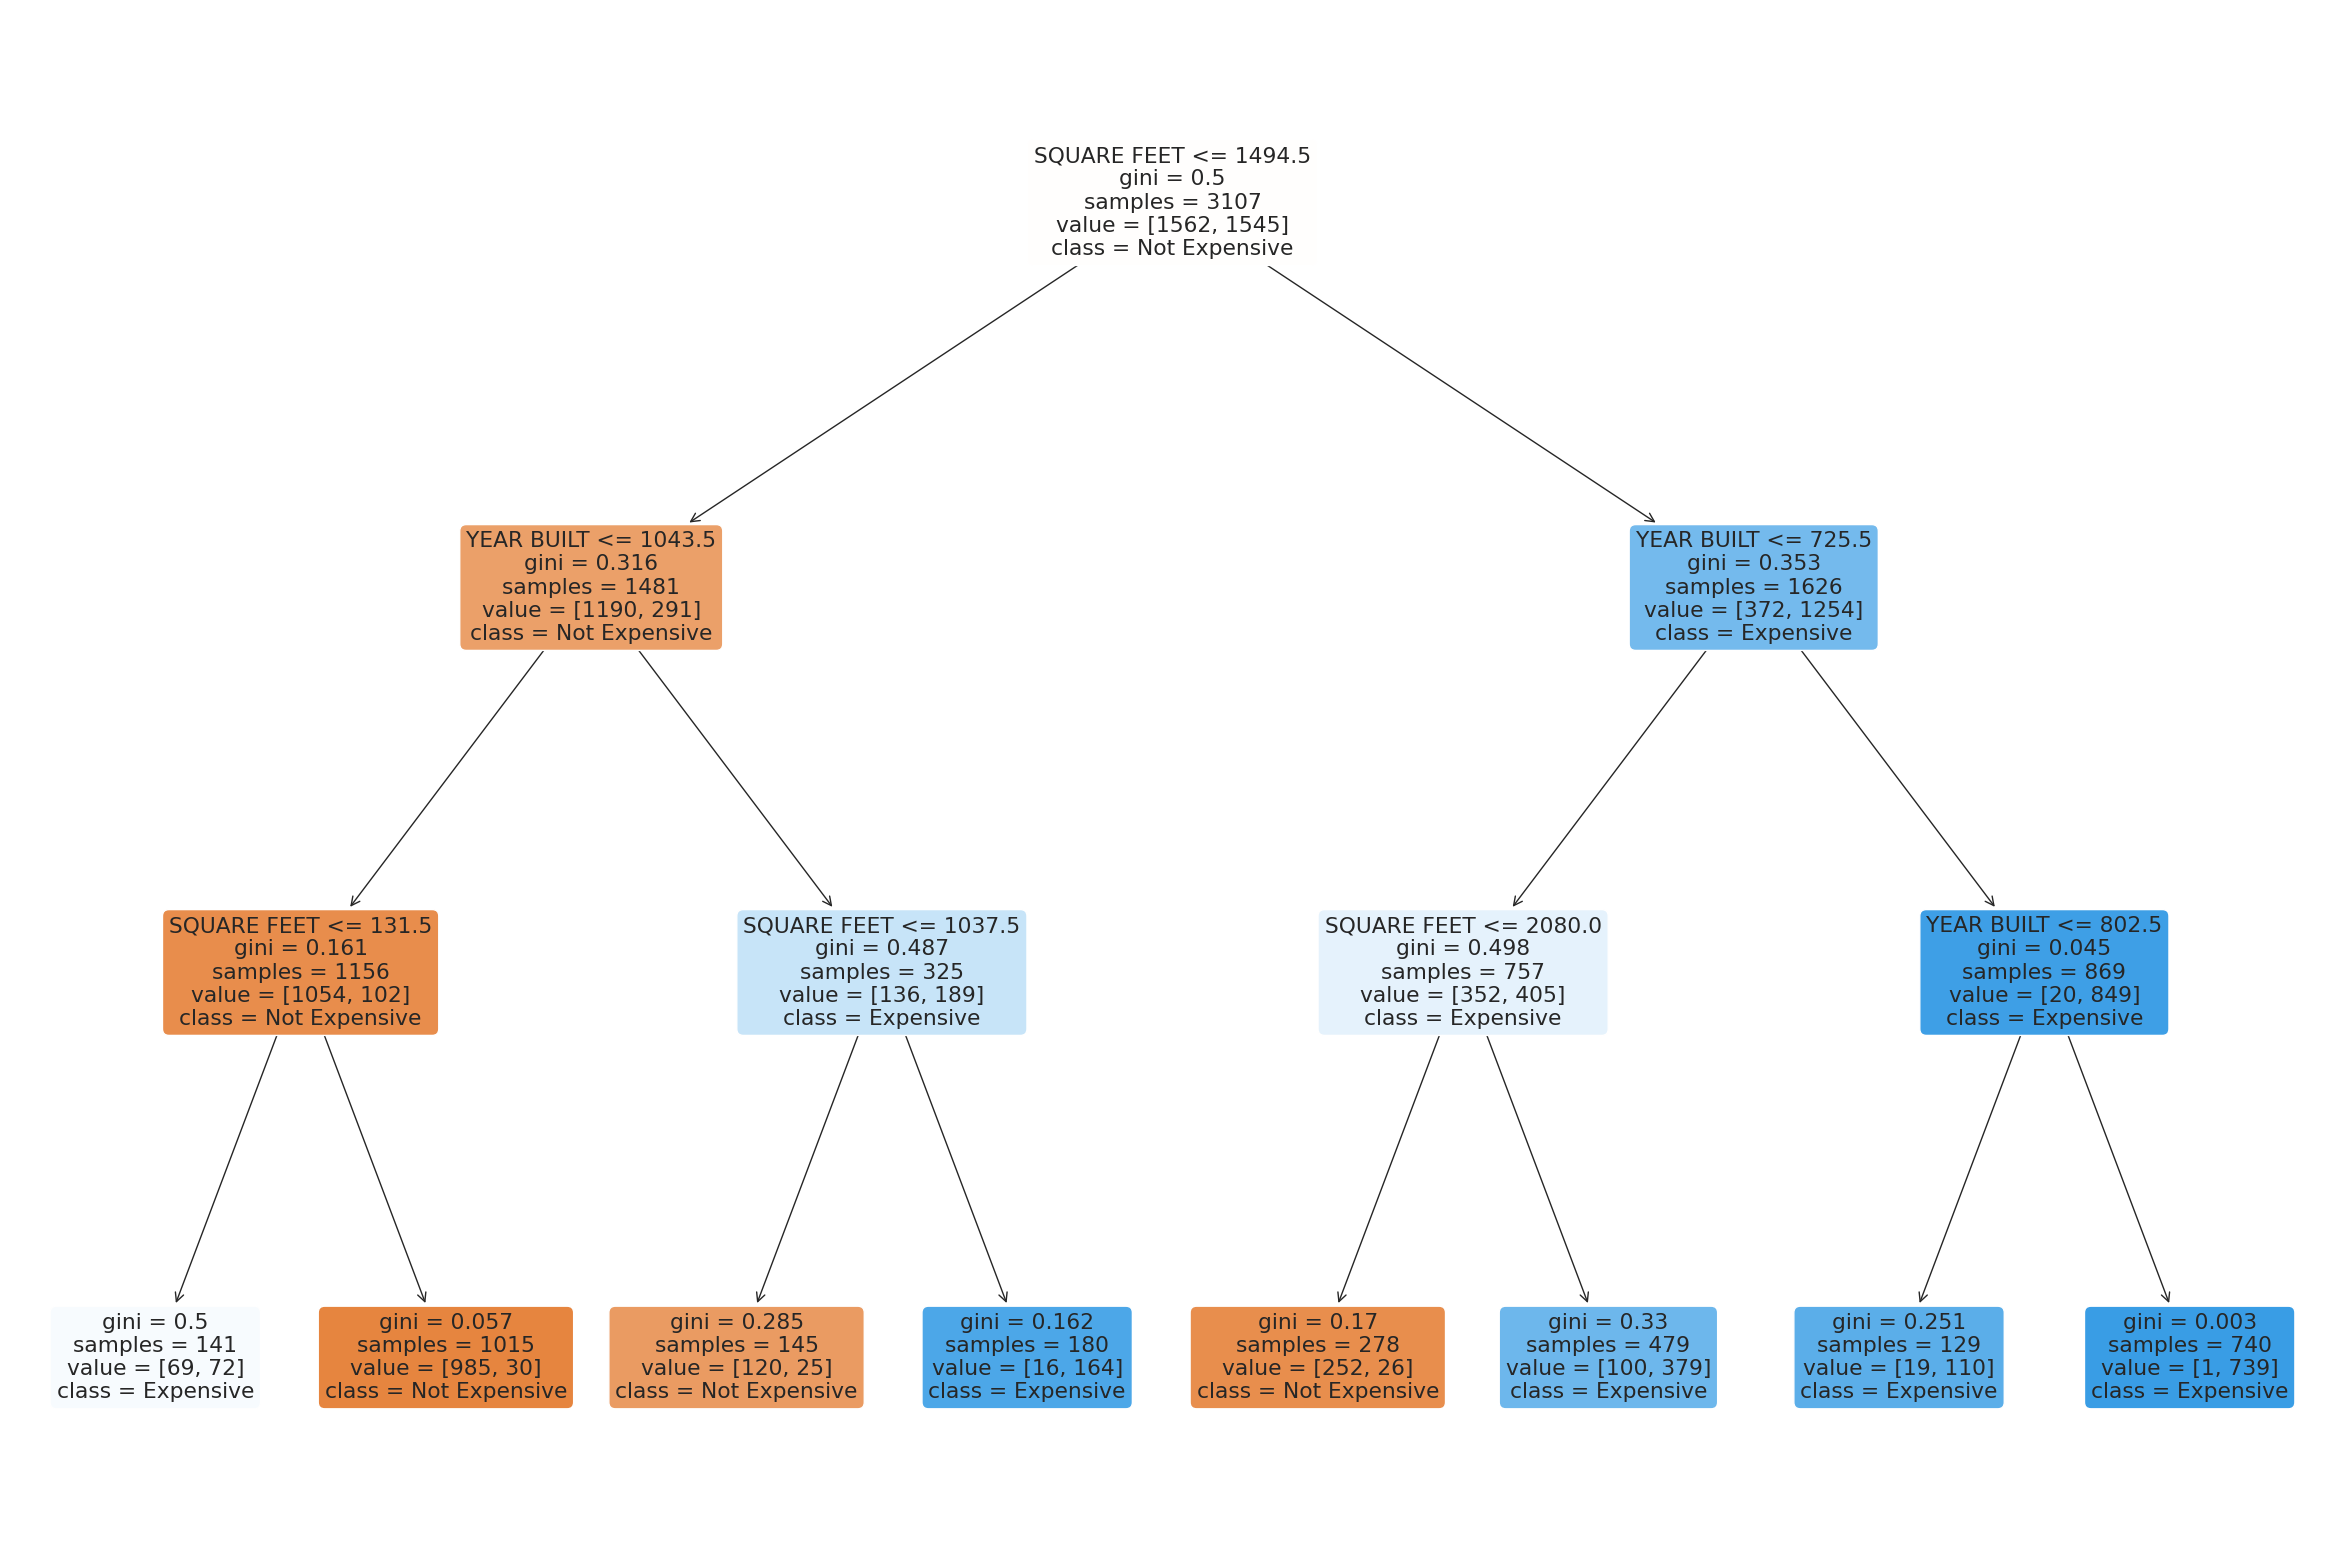

In [94]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


clf2 = DecisionTreeClassifier(random_state=0, max_depth=3)

# Fit the model on the training data
clf2.fit(X3_train, y3_train)

# Predict the labels on the test data
y3_pred = clf2.predict(X3_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y3_test, y3_pred)

print(f"Decision Tree Classifier Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names=features_to_use2, class_names=['Not Expensive', 'Expensive'], filled=True, rounded=True)
plt.savefig('decision_tree.png', dpi=300) # Saves the plot as a file
plt.show()

## Feature importance

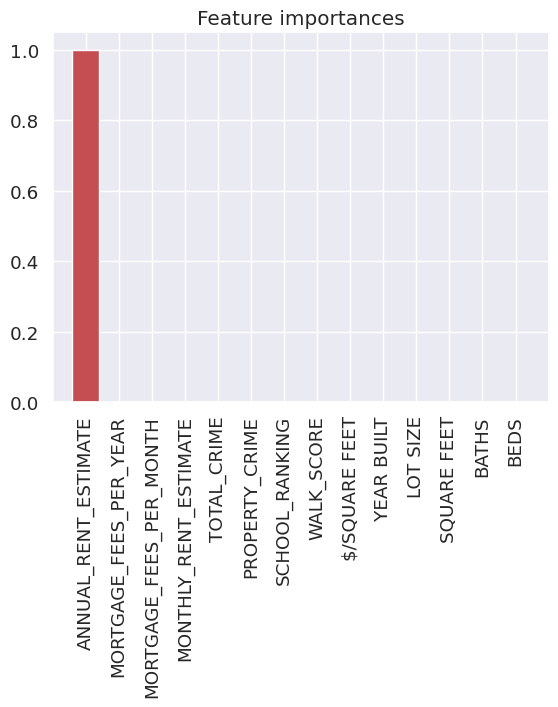

In [95]:
import matplotlib.pyplot as plt



# Get feature importances
importances = clf2.feature_importances_

# Get the indices of the most important features, sorted by importance
indices = importances.argsort()[::-1]

# List of features used in training the model
features_to_use2 = [
    'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
    '$/SQUARE FEET', 'WALK_SCORE', 'SCHOOL_RANKING',
    'PROPERTY_CRIME', 'TOTAL_CRIME','MONTHLY_RENT_ESTIMATE','ANNUAL_RENT_ESTIMATE','MORTGAGE_FEES_PER_MONTH','MORTGAGE_FEES_PER_YEAR'
]

# Get the number of features
num_features = len(features_to_use2)

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="r", align="center")
plt.xticks(range(num_features), [features_to_use2[i] for i in indices], rotation='vertical')
plt.xlim([-1, num_features])
plt.show()


## Confusion Matrix

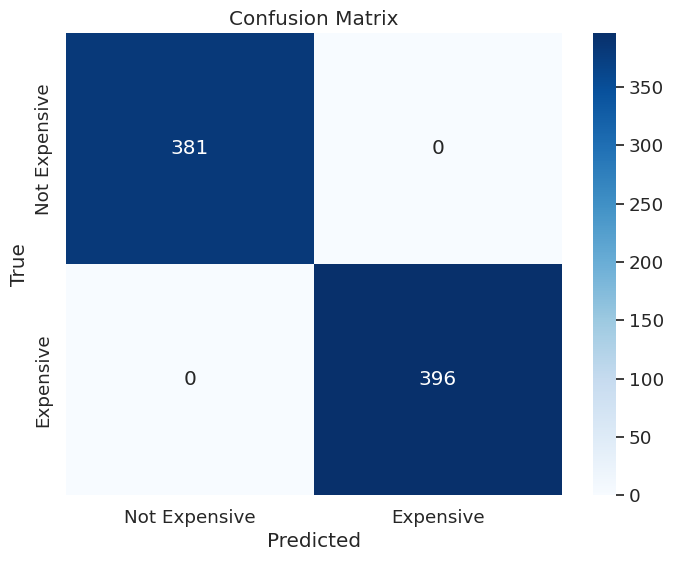

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y3_test, y3_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Expensive', 'Expensive'], yticklabels=['Not Expensive', 'Expensive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()